In [1]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data loading

In [9]:
# Load dataset
file_path = '../data/IMDB Dataset.csv'
df = pd.read_csv(file_path)
df.columns = ['review', 'sentiment']



In [10]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

## Clean the Text Data

In [11]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize the tokens
    doc = nlp(' '.join(tokens))
    lemmatized = [token.lemma_ for token in doc]
    # Rejoin tokens into a single string
    return ' '.join(lemmatized)



In [8]:
# Apply text cleaning to the dataset
df['clean_text'] = df['review'].apply(clean_text)

# Map sentiment labels to binary values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})




KeyboardInterrupt: 

In [ ]:
# Save the preprocessed dataset (optional)
df.to_csv('../data/processed_data.csv', index=False)

# Preview the processed data
df.head()

In [15]:
# Import necessary libraries
import pandas as pd
import spacy
import swifter  # Install using `pip install swifter`

# Load spaCy's English model (optimized for speed)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # Disable unnecessary components for efficiency

# Define text cleaning function using spaCy
def clean_text_spacy(text):
    """
    Function to clean and preprocess text using spaCy.
    - Converts text to lowercase.
    - Removes stopwords and non-alphabetic tokens.
    - Lemmatizes the tokens.
    """
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)

In [13]:
pip install swifter

  Using cached swifter-1.4.0-py3-none-any.whl
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 5.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.1/1.3 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   --------------------------------------- 244.3/244.3 kB 15.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.4 kB ? eta -:--:--
   ---------------------------------------- 56.4/56.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   - -------------------------------------- 0.7/25.1 MB 14.6 MB/s eta 0:00:02
   - -------------------------------------- 1.1/25.1 MB 14.3 MB/s eta 0:00:02
   -- ------------------------------------- 1.6/25.1 MB 12.9 MB


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Load the IMDB dataset
file_path = '../data/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [17]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
# Rename columns for consistency
df.columns = ["review", "sentiment"]

In [19]:
# Apply the cleaning function using swifter for parallelization
df["clean_text"] = df["review"].swifter.apply(clean_text_spacy)

Pandas Apply: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [49:05<00:00, 16.97it/s]


In [20]:
# Map sentiment labels to binary values (positive = 1, negative = 0)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

In [21]:
# Save the cleaned dataset for future use
processed_file_path = '../data/processed_data.csv'
df.to_csv(processed_file_path, index=False)

# Preview the first few rows
print("Text cleaning complete! Here's a preview of the cleaned dataset:")
print(df.head())

Text cleaning complete! Here's a preview of the cleaned dataset:
                                              review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                          clean_text  
0  reviewer mention watch oz episode hook right e...  
1  wonderful little production br filming techniq...  
2  think wonderful way spend time hot summer week...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


## Load Cleaned Data

In [27]:
import pandas as pd

# Load the cleaned dataset
file_path = '../data/processed_data.csv'
df1 = pd.read_csv(file_path)

# Preview the dataset
print("Cleaned dataset loaded successfully!")
print(df1.head())


Cleaned dataset loaded successfully!
                                              review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                          clean_text  
0  reviewer mention watch oz episode hook right e...  
1  wonderful little production br filming techniq...  
2  think wonderful way spend time hot summer week...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


## . Vectorize Text with TF-IDF

In [29]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 10.2 MB/s eta 0:00:02
   - -------------------------------------- 0.3/11.1 MB 5.3 MB/s eta 0:00:03
   - -------------------------------------- 0.6/11.1 MB 5.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.1 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.1 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.1 MB 5.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 5.3 MB/s eta 0:00:02
   ------- -


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['sentiment'], test_size=0.2, random_state=42
)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use the top 5000 features for efficiency

# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF vectorization complete!")

TF-IDF vectorization complete!


##  Train Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logreg.fit(X_train_tfidf, y_train)

# Predict sentiment on the test data
y_pred = logreg.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Model Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.86      0.88      4961
    Positive       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Visualize the Results

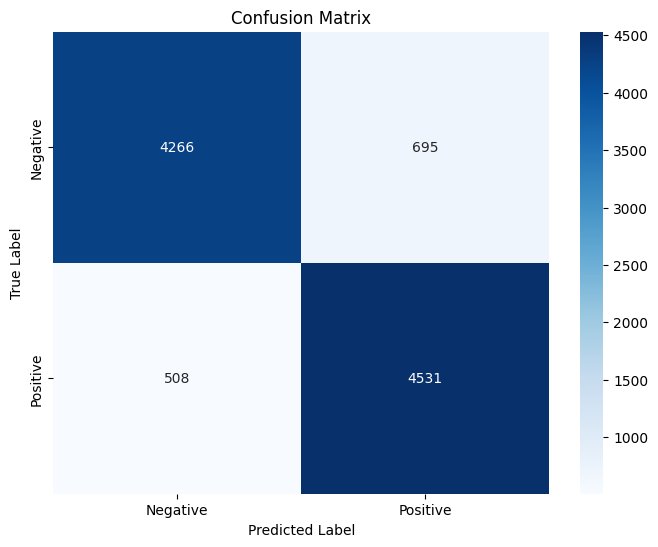

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Save the Model and Vectorizer

In [35]:
import joblib

# Save the trained model and vectorizer
joblib.dump(logreg, '../models/logistic_regression_model.pkl')
joblib.dump(tfidf_vectorizer, '../models/tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [37]:
# Fit the vectorizer and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Save the fitted vectorizer
joblib.dump(tfidf_vectorizer, '../models/tfidf_vectorizer.pkl')


['../models/tfidf_vectorizer.pkl']

## Key Insights from the Results:
Overall Accuracy:

The model achieves 88% accuracy, indicating that it correctly predicts sentiment for the majority of the reviews.
Precision and Recall:

Both Negative and Positive classes are well-balanced with similar precision (0.88) and recall (0.88).
This suggests that the model performs equally well on both classes without significant bias.
F1-Score:

The F1-score for both classes is ~0.88, which confirms that the model maintains a good balance between precision and recall.
Support:

The dataset is balanced, with roughly equal instances for both classes (Negative: 4961, Positive: 5039).

In [36]:
with open('../models/classification_report.txt', 'w') as f:
    from sklearn.metrics import classification_report
    f.write(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print("Classification report saved successfully!")


Classification report saved successfully!
